In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
col = df.isnull().sum()
col[col>1]

Series([], dtype: int64)

In [5]:
df.dropna(inplace = True)

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [16]:
df.shape

(5172, 3002)

In [17]:
for i in df.columns:
    for word in stop_words:
        if( i == word):
            df.drop(i, axis =1, inplace = True)

In [18]:
df.shape


(5172, 2868)

In [19]:
df

,Email No.,ect,hou,enron,com,gas,deal,meter,hpl,please,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,24,27,1,3,1,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,22,10,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,17,9,0,0,2,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,11,3,1,3,5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,1,0,0,4,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [25]:
X = df.iloc[:, 1:2868]
y = df.iloc[:,-1]

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [28]:
X

array([[-2.93894800e-01, -2.90555825e-01, -2.92175589e-01, ...,
        -3.29048481e-01, -7.09707234e-02, -6.39137491e-01],
       [ 1.33733653e+00,  3.58474290e+00, -7.33612035e-02, ...,
         3.06722427e-02, -7.09707234e-02, -6.39137491e-01],
       [-2.93894800e-01, -2.90555825e-01, -2.92175589e-01, ...,
        -3.29048481e-01, -7.09707234e-02, -6.39137491e-01],
       ...,
       [-2.93894800e-01, -2.90555825e-01, -2.92175589e-01, ...,
        -3.29048481e-01, -7.09707234e-02,  1.56460858e+00],
       [-2.93894800e-01, -2.90555825e-01, -2.92175589e-01, ...,
         3.06722427e-02, -7.09707234e-02,  1.56460858e+00],
       [-1.02023951e-02, -3.49666036e-03, -7.33612035e-02, ...,
        -3.29048481e-01, -7.09707234e-02, -6.39137491e-01]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
# K nearest

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.9410628019323671

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       742
           1       0.88      0.92      0.90       293

    accuracy                           0.94      1035
   macro avg       0.92      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



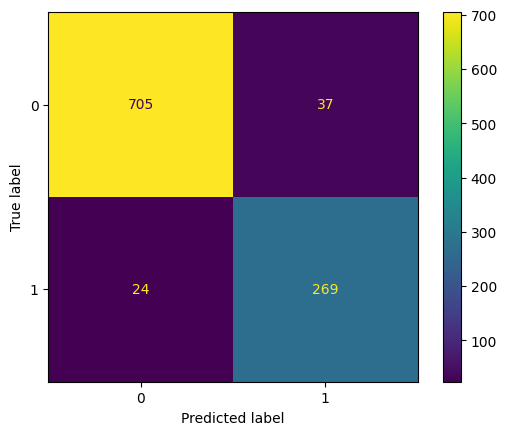

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_pred_knn, y_test)).plot()

In [47]:
# support vector machine

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc)

0.9478260869565217

In [50]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       703
           1       0.95      0.88      0.92       332

    accuracy                           0.95      1035
   macro avg       0.95      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



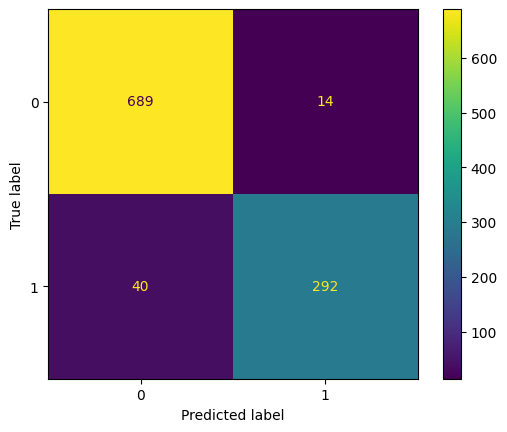

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_pred_svc, y_test)).plot()